In [ ]:
from keras.applications.vgg19 import VGG19
from keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from keras.layers import Dense, Flatten
from keras.datasets import cifar10
import matplotlib.pyplot as plt
import cv2
import numpy as np

#Dataseti yükleme


In [ ]:
(X_train,y_train),(X_test,y_test)=cifar10.load_data()

170508288/170498071 [==============================] - 3s 0us/step


In [ ]:
X_train.shape

(50000, 32, 32, 3)

In [ ]:
X_train[0].shape

(32, 32, 3)

In [ ]:
y_train.shape

(50000, 1)

In [ ]:
y_train[0]

array([6], dtype=uint8)

In [ ]:
numberofclass=10
y_train=to_categorical(y_train,numberofclass)
y_test=to_categorical(y_test,numberofclass)

In [ ]:
input_shape=X_train.shape[1:]

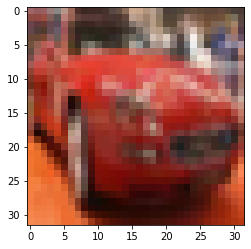

In [ ]:
plt.imshow(X_train[5])
plt.show()

In [ ]:
y_train[:10]

array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]], dtype=float32)

#VGG modeline uygun olması için input shape değerini 48*48 hale getirmek gerekli (openCV)


In [ ]:
def resize_img(img):
  numberofimage=img.shape[0]
  new_array=np.zeros((numberofimage,48,48,3))
  for i in range(numberofimage):
    new_array[i]=cv2.resize(img[i,:,:,:],(48,48))
  return new_array
X_train=resize_img(X_train)
X_test=resize_img(X_test)

In [ ]:
print(X_train.shape,X_test.shape)

(50000, 48, 48, 3) (10000, 48, 48, 3)


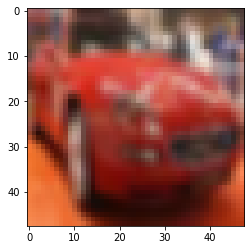

In [ ]:
plt.figure()
plt.imshow(X_train[5].astype(np.uint8))
plt.show()

In [ ]:
vgg=VGG19(include_top=False, weights="imagenet", input_shape=(48,48,3))

80150528/80134624 [==============================] - 1s 0us/step


In [ ]:
vgg.summary()

Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 48, 48, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 48, 48, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 48, 48, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 24, 24, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 24, 24, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 24, 24, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 12, 12, 128)       0     

In [ ]:
vg_layer_list=vgg.layers
vg_layer_list

In [ ]:
model=Sequential()
for layer in vg_layer_list:
  model.add(layer)
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 48, 48, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 48, 48, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 24, 24, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 24, 24, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 24, 24, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 12, 12, 128)       0         
                                                                 
 block3_conv1 (Conv2D)       (None, 12, 12, 256)       2

In [ ]:
for layer in model.layers:
  layer.trainable=False
#Add fully connected layer
model.add(Flatten())
model.add(Dense(128))
model.add(Dense(numberofclass,activation="softmax"))
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 48, 48, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 48, 48, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 24, 24, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 24, 24, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 24, 24, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 12, 12, 128)       0         
                                                                 
 block3_conv1 (Conv2D)       (None, 12, 12, 256)       2

In [ ]:
model.compile(loss= "categorical_crossentropy",
              optimizer="rmsprop",
              metrics="accuracy")
hist=model.fit(X_train,y_train,epochs=5,validation_split=0.2,batch_size=1000)

Epoch 1/5
40/40 [==============================] - 1282s 32s/step - loss: 9.0203 - accuracy: 0.4002 - val_loss: 5.0909 - val_accuracy: 0.4774
Epoch 2/5
40/40 [==============================] - 1270s 32s/step - loss: 4.6701 - accuracy: 0.4957 - val_loss: 4.0470 - val_accuracy: 0.4921
Epoch 3/5
40/40 [==============================] - 1264s 32s/step - loss: 3.7609 - accuracy: 0.5152 - val_loss: 3.3790 - val_accuracy: 0.5215
Epoch 4/5
40/40 [==============================] - 1275s 32s/step - loss: 3.4152 - accuracy: 0.5217 - val_loss: 3.2774 - val_accuracy: 0.5036
Epoch 5/5
40/40 [==============================] - 1276s 32s/step - loss: 3.1121 - accuracy: 0.5232 - val_loss: 2.9985 - val_accuracy: 0.5225


In [ ]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 270s 858ms/step - loss: 2.9943 - accuracy: 0.5204


[2.9943387508392334, 0.5203999876976013]